In [109]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
cf.go_offline()
py.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from wordcloud import WordCloud
from tqdm import tqdm # for showing progressbars
import re
plt.style.use('ggplot')

In [2]:
zomato_df = pd.read_csv("zomato.csv")
zomato_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
zomato_df.loc[:,zomato_df.columns!='votes'].describe()

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/kamat-bugle-r...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [8]:
zomato_df.drop(['url','phone', 'address'], axis=1, inplace=True)
zomato_df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
# Renaming columns
zomato_df.rename({'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'list_city'}, axis=1, inplace=True)

In [10]:
# 38 duplicate rows in the dataset. Remove it
zomato_df.duplicated().sum()
zomato_df.drop_duplicates(inplace=True)

In [11]:
zomato_df[['Rating', 'total_rating']] = zomato_df.rate.str.split('/', expand=True)
zomato_df.drop(['rate', 'total_rating'], axis=1, inplace=True)

In [12]:
# Drop those rows whose rating is NaN
zomato_df.dropna(subset=['Rating'], inplace=True)

In [13]:
# Update Rating of NEW and - to 0.0
zomato_df.loc[zomato_df['Rating'] == 'NEW', 'Rating'] = 0.0
zomato_df.loc[zomato_df['Rating'] == '-', 'Rating'] = 0.0

In [14]:
zomato_df.columns

Index(['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'list_city', 'Rating'],
      dtype='object')

In [15]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43894 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          43894 non-null  object
 1   online_order  43894 non-null  object
 2   book_table    43894 non-null  object
 3   votes         43894 non-null  int64 
 4   location      43894 non-null  object
 5   rest_type     43743 non-null  object
 6   dish_liked    23597 non-null  object
 7   cuisines      43883 non-null  object
 8   cost          43643 non-null  object
 9   reviews_list  43894 non-null  object
 10  menu_item     43894 non-null  object
 11  type          43894 non-null  object
 12  list_city     43894 non-null  object
 13  Rating        43894 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [16]:
zomato_df.dropna(inplace=True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          23395 non-null  object
 1   online_order  23395 non-null  object
 2   book_table    23395 non-null  object
 3   votes         23395 non-null  int64 
 4   location      23395 non-null  object
 5   rest_type     23395 non-null  object
 6   dish_liked    23395 non-null  object
 7   cuisines      23395 non-null  object
 8   cost          23395 non-null  object
 9   reviews_list  23395 non-null  object
 10  menu_item     23395 non-null  object
 11  type          23395 non-null  object
 12  list_city     23395 non-null  object
 13  Rating        23395 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.7+ MB


In [17]:
# Convert Rating column from string to float
zomato_df['Rating'] = pd.to_numeric(zomato_df['Rating'])

In [18]:
zomato_df.isnull().sum()

name            0
online_order    0
book_table      0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
list_city       0
Rating          0
dtype: int64

In [19]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23395 non-null  object 
 1   online_order  23395 non-null  object 
 2   book_table    23395 non-null  object 
 3   votes         23395 non-null  int64  
 4   location      23395 non-null  object 
 5   rest_type     23395 non-null  object 
 6   dish_liked    23395 non-null  object 
 7   cuisines      23395 non-null  object 
 8   cost          23395 non-null  object 
 9   reviews_list  23395 non-null  object 
 10  menu_item     23395 non-null  object 
 11  type          23395 non-null  object 
 12  list_city     23395 non-null  object 
 13  Rating        23395 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 2.7+ MB


In [20]:
zomato_df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [21]:
zomato_df['cost'] = zomato_df.cost.apply(lambda x: x.replace(',',''))
zomato_df

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,list_city,Rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield,3.8
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield,3.9
51708,Keys Cafe - Keys Hotel,No,No,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield,2.8
51711,Bhagini,No,No,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5


In [22]:
zomato_df['cost'] = pd.to_numeric(zomato_df['cost'])

In [23]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23395 non-null  object 
 1   online_order  23395 non-null  object 
 2   book_table    23395 non-null  object 
 3   votes         23395 non-null  int64  
 4   location      23395 non-null  object 
 5   rest_type     23395 non-null  object 
 6   dish_liked    23395 non-null  object 
 7   cuisines      23395 non-null  object 
 8   cost          23395 non-null  int64  
 9   reviews_list  23395 non-null  object 
 10  menu_item     23395 non-null  object 
 11  type          23395 non-null  object 
 12  list_city     23395 non-null  object 
 13  Rating        23395 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 2.7+ MB


In [24]:
# Replace Yes/No with True/False
zomato_df.online_order.replace({'Yes','No'}, {True, False}, inplace=True)
zomato_df.book_table.replace({'Yes','No'}, {True, False}, inplace=True)

In [25]:
zomato_df

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,list_city,Rating
0,Jalsa,True,True,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,Spice Elephant,True,False,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,San Churro Cafe,True,False,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,False,False,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,Grand Village,False,False,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,True,True,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield,3.8
51707,M Bar - Bengaluru Marriott Hotel Whitefield,False,False,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield,3.9
51708,Keys Cafe - Keys Hotel,False,False,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield,2.8
51711,Bhagini,False,False,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5


In [26]:
# Encode all non-numeric column values based on the value in that cell position
# As an example, see how location column will get encoded.
# All values of location column with Banashankari will encode to 0, Basavanagudi to 1 and so on.
zomato_df['location'].factorize()
# Actual encoding code in next cell

(array([ 0,  0,  0, ..., 49, 49, 50]),
 Index(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
        'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli', 'South Bangalore',
        'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar', 'BTM', 'Wilson Garden',
        'Koramangala 5th Block', 'Shanti Nagar', 'Richmond Road', 'City Market',
        'Bellandur', 'Sarjapur Road', 'Marathahalli', 'HSR', 'Old Airport Road',
        'Indiranagar', 'Koramangala 1st Block', 'East Bangalore', 'MG Road',
        'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
        'Residency Road', 'Shivajinagar', 'Infantry Road', 'St. Marks Road',
        'Cunningham Road', 'Race Course Road', 'Domlur',
        'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
        'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
        'Koramangala 6th Block', 'Majestic', 'Langford Town',
        'Koramangala 7th Block', 'Brookefield', 'Whitefield',
        'ITPL M

In [27]:
def Encode_column(zomato):
    for col in zomato.columns:
        if col not in ['votes','cost','Rating']:
            zomato[col] = zomato[col].factorize()[0]
    return zomato

zomato_df_encoded = Encode_column(zomato_df.copy())
zomato_df_encoded.head(10)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,list_city,Rating
0,0,0,0,775,0,0,0,0,800,0,0,0,0,4.1
1,1,0,1,787,0,0,1,1,800,1,0,0,0,4.1
2,2,0,1,918,0,1,2,2,800,2,0,0,0,3.8
3,3,1,1,88,0,2,3,3,300,3,0,0,0,3.7
4,4,1,1,166,1,0,4,4,600,4,0,0,0,3.8
5,5,0,1,286,1,0,5,5,600,5,0,0,0,3.8
7,6,0,0,2556,0,3,6,6,600,6,0,1,0,4.6
8,7,0,1,324,0,4,7,7,700,7,0,1,0,4.0
9,8,0,1,504,0,4,8,8,550,8,0,1,0,4.2
10,9,0,1,402,0,4,9,9,500,9,0,1,0,4.1


In [28]:
zomato_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23395 non-null  int64  
 1   online_order  23395 non-null  int64  
 2   book_table    23395 non-null  int64  
 3   votes         23395 non-null  int64  
 4   location      23395 non-null  int64  
 5   rest_type     23395 non-null  int64  
 6   dish_liked    23395 non-null  int64  
 7   cuisines      23395 non-null  int64  
 8   cost          23395 non-null  int64  
 9   reviews_list  23395 non-null  int64  
 10  menu_item     23395 non-null  int64  
 11  type          23395 non-null  int64  
 12  list_city     23395 non-null  int64  
 13  Rating        23395 non-null  float64
dtypes: float64(1), int64(13)
memory usage: 2.7 MB


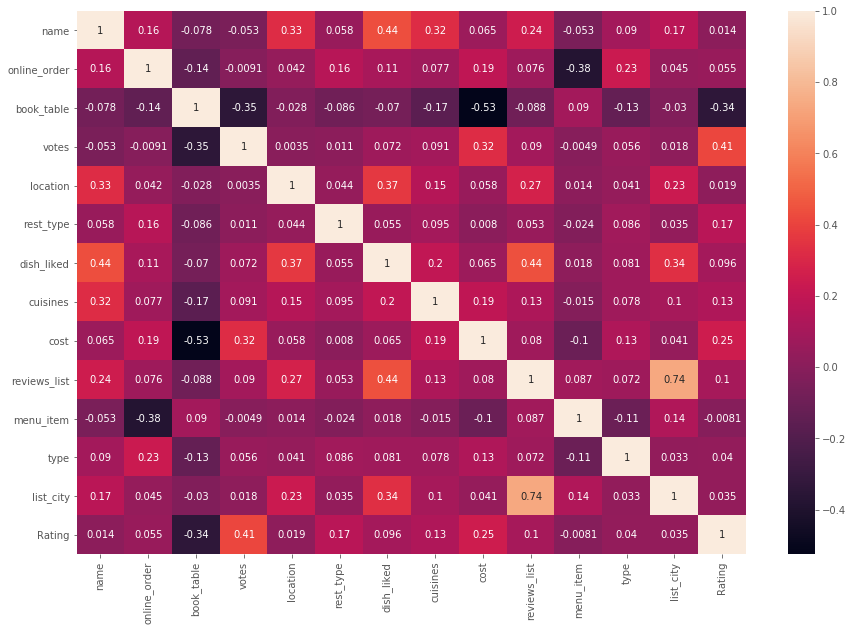

In [29]:
corr = zomato_df_encoded.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

## Graphs

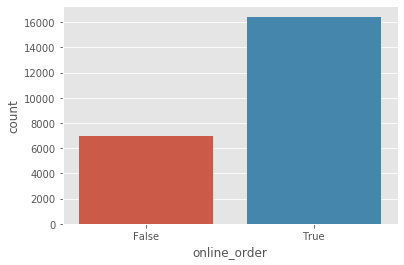

In [30]:
#Restaurants delivering Online or not
df = zomato_df.groupby('online_order').count()
#df.name.plot.bar()
#----------------------
sns.countplot(data=zomato_df, x='online_order')

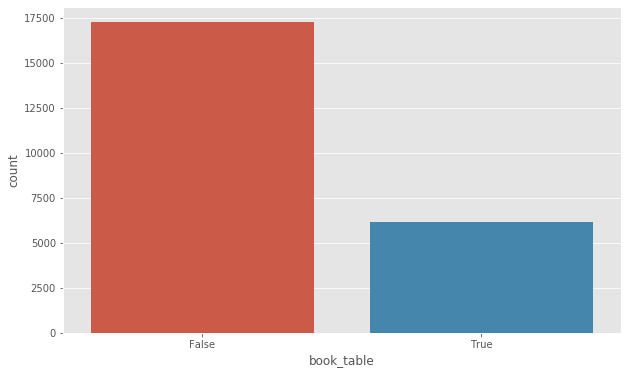

In [31]:
# Restaurants allowing table booking or not
sns.countplot(data=zomato_df, x='book_table')
fig = plt.gcf()
fig.set_size_inches(10,6)

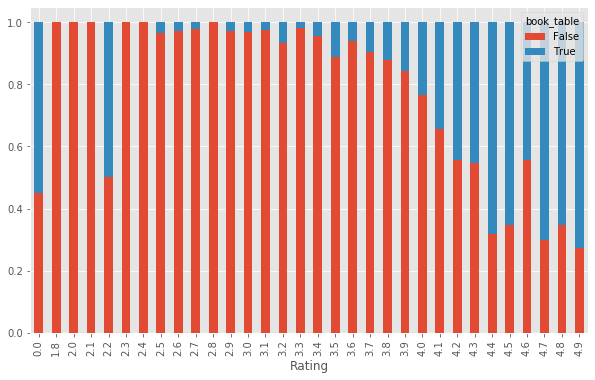

In [32]:
# Gives count of restaurants pf both types(allow table booking and ones which do not allow) vs all existing ratings
X = pd.crosstab(zomato_df['Rating'], zomato_df['book_table'])
# Gives percentage of restaurants for each rating against both types(allows table booking and ones which do not allow)
rest_percent = X.div(X.sum(axis=1), axis=0)
rest_percent.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10,6)
# Conclusion --> Highly rated restaurants mostly allow table bookings

Text(0.5, 1.0, 'Location wise count for restaurants')

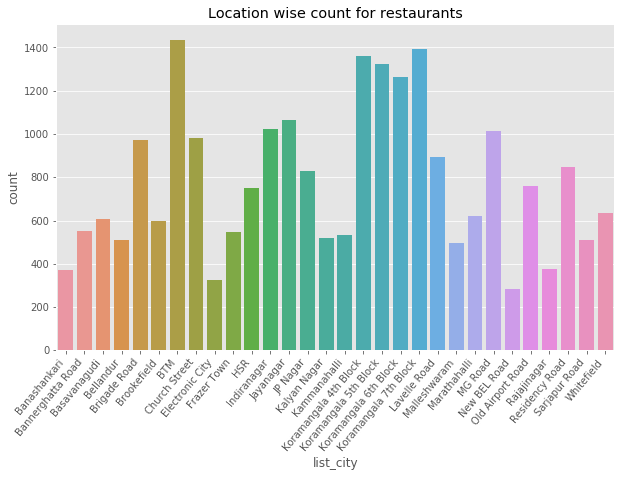

In [33]:
# Location wise count for restaurants
ax = sns.countplot(zomato_df['list_city'])
fig = plt.gcf()
fig.set_size_inches(10,6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Location wise count for restaurants")

In [34]:
# Top 20 locations by restaurant count(pie chart)
rest_by_location = zomato_df.groupby('location').location.count()
rest_by_loc_top_20 = rest_by_location.sort_values(ascending=False).head(20)
rest_by_loc_top_20

location
Koramangala 5th Block    1799
BTM                      1482
Indiranagar              1371
HSR                      1177
Jayanagar                1067
JP Nagar                 1020
Whitefield                835
Koramangala 7th Block     744
Koramangala 6th Block     726
Marathahalli              683
Koramangala 4th Block     664
MG Road                   602
Brigade Road              570
Church Street             512
Bannerghatta Road         498
Ulsoor                    477
Bellandur                 474
Kalyan Nagar              468
Koramangala 1st Block     466
Sarjapur Road             457
Name: location, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d0f4450>],
      dtype=object)

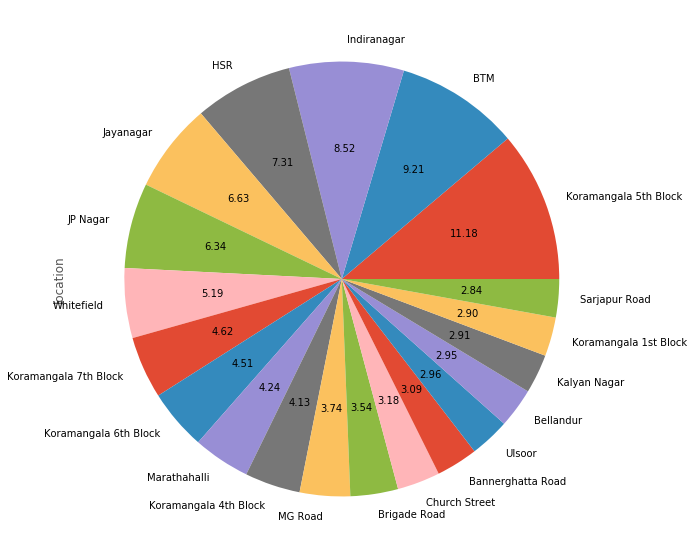

In [35]:
rest_by_loc_top_20.plot.pie(subplots=True, figsize=(10,10), autopct='%.2f')

In [36]:
# Top 20 rated restaurants area-wise
zomato_top_loc_rating = zomato_df.sort_values(by='Rating', ascending=False).head(20).loc[:,['location', 'Rating']]
zomato_top_loc_rating

,location,Rating
28403,Koramangala 5th Block,4.9
19393,BTM,4.9
6746,Whitefield,4.9
45812,Indiranagar,4.9
5153,Brigade Road,4.9
40095,Malleshwaram,4.9
49170,Sarjapur Road,4.9
26497,Koramangala 5th Block,4.9
21770,BTM,4.9
32436,Koramangala 5th Block,4.9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d602050>],
      dtype=object)

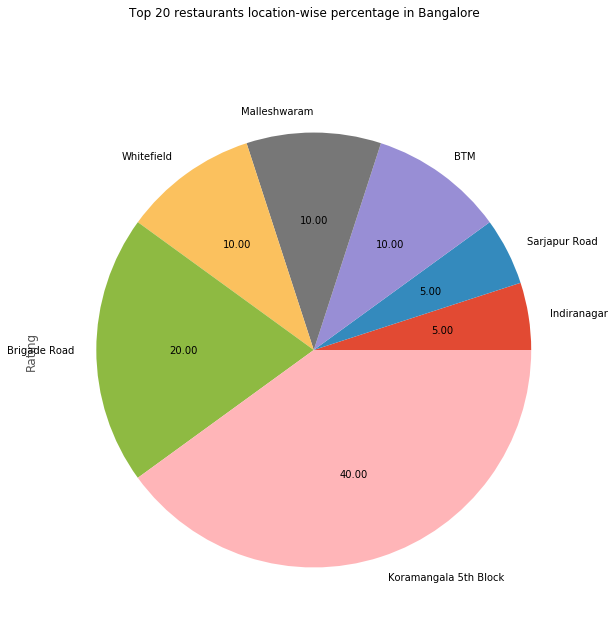

In [37]:
zomato_top_loc_rating.groupby('location').count().sort_values(by='Rating').plot.pie(title='Top 20 restaurants location-wise percentage in Bangalore', subplots=True, legend=False, autopct='%.2f', figsize=(10,10))

Text(0.5, 1.0, 'Location wise ratings of Bengaluru restaurants')

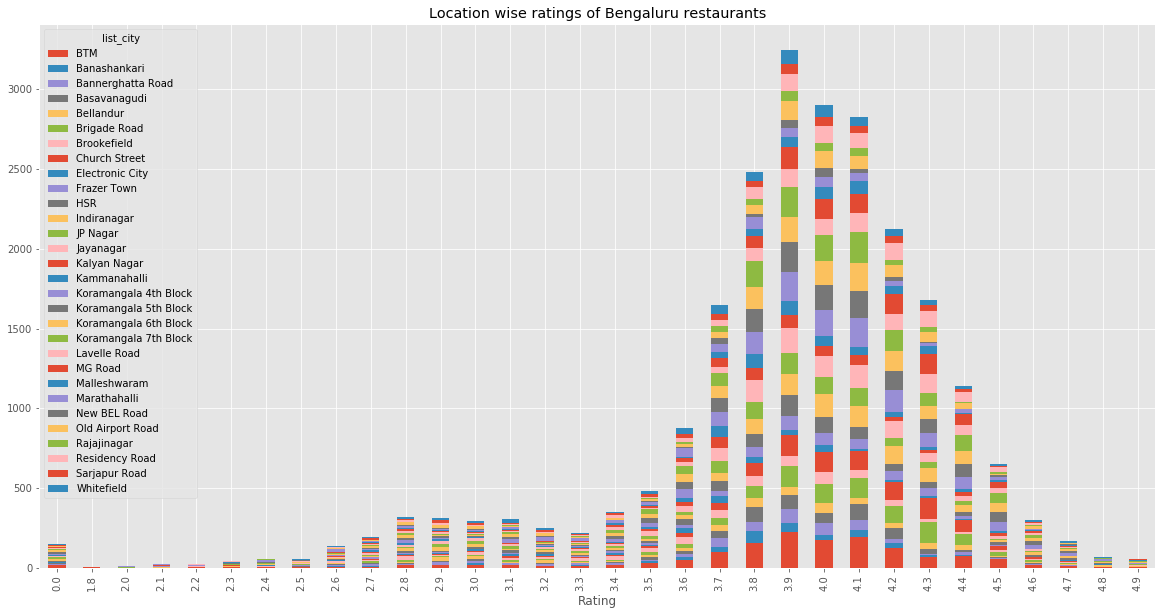

In [38]:
loc_vs_rating = pd.crosstab(zomato_df['Rating'], zomato_df['list_city'])
ax = loc_vs_rating.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(20,10)
ax.set_title("Location wise ratings of Bengaluru restaurants")

Text(0.5, 1.0, 'Count of different types of restaurants')

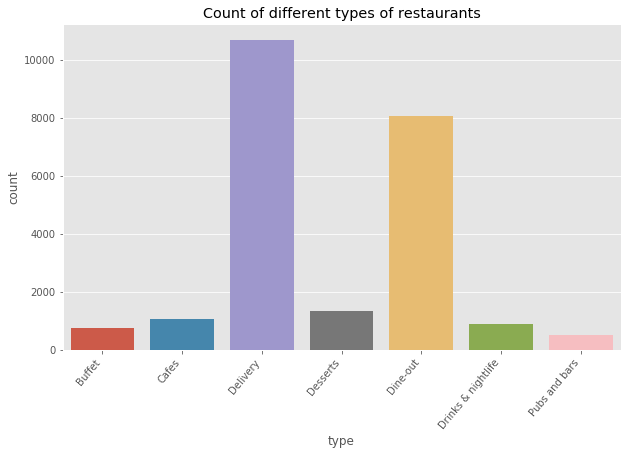

In [39]:
# Count of different types of restaurants
ax = sns.countplot(zomato_df['type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title("Count of different types of restaurants")

Text(0, 0.5, 'Count of restaurants')

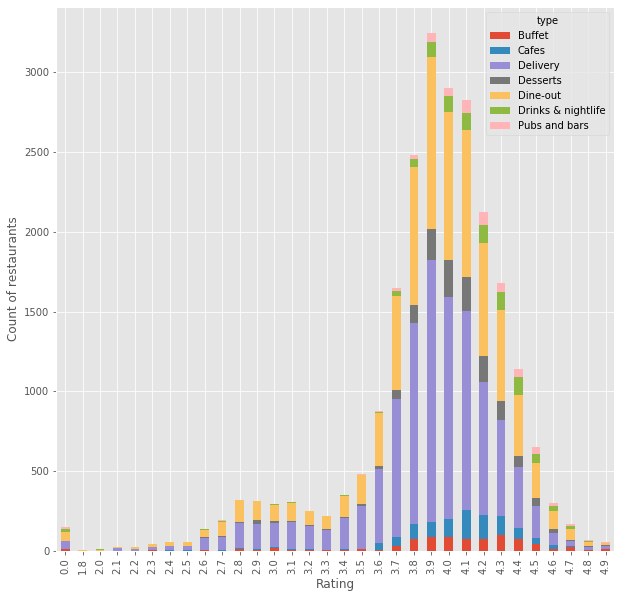

In [40]:
# Rest type vs Rating
type_vs_rating = pd.crosstab(zomato_df['Rating'], zomato_df['type'])
type_vs_rating.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
# plt.legend().remove()
plt.ylabel("Count of restaurants")

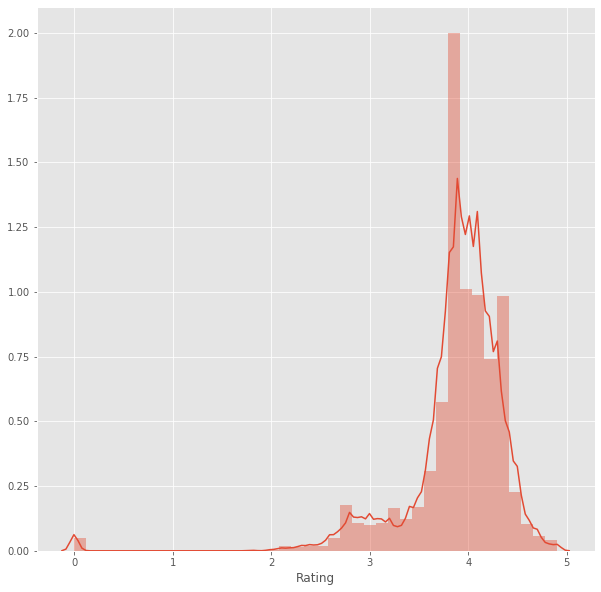

In [41]:
# Instead if we want to see the distribution of rating of all restaurants(not split by their type)
sns.distplot(zomato_df['Rating'], kde=True, bins=40)
fig = plt.gcf()
fig.set_size_inches(10,10)

Text(0.5, 1.0, 'Count of restaurants w.r.t their avg. cost(for two people)')

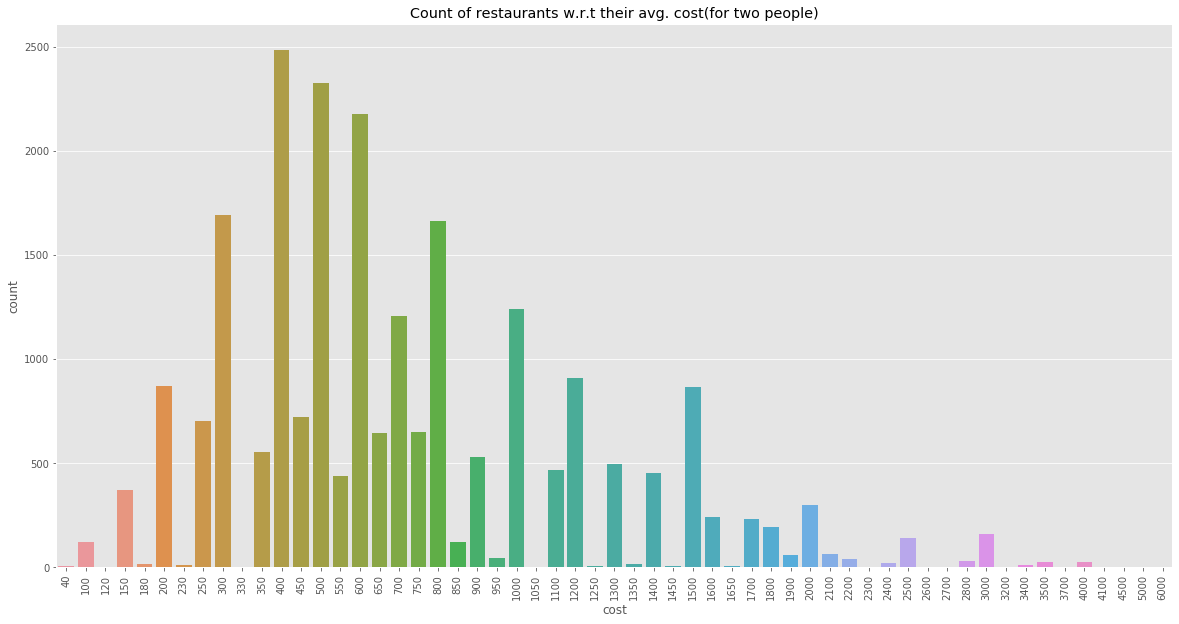

In [42]:
# Number of restaurants vs cost
ax = sns.countplot(zomato_df['cost'])
fig = plt.gcf()
fig.set_size_inches(20,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Count of restaurants w.r.t their avg. cost(for two people)")

Text(0.5, 0, 'Number of restaurants')

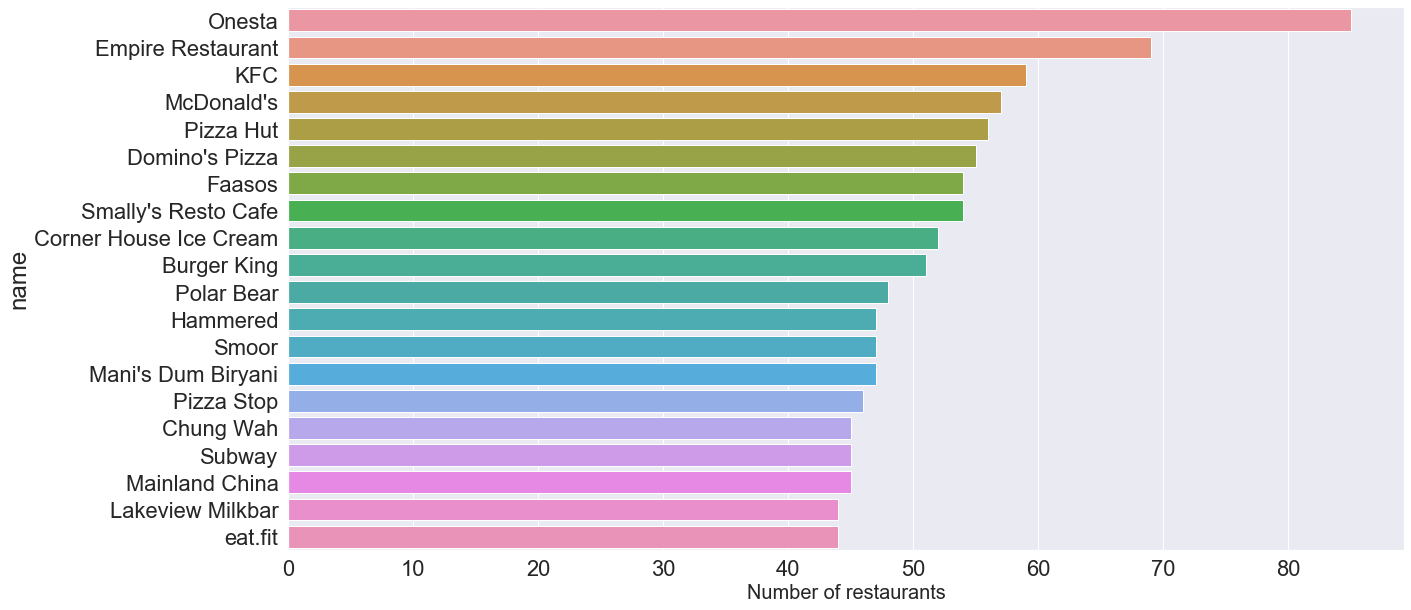

In [43]:
# TOp 20 restuarant chains in Bangalore
Y = zomato_df.groupby('name').count().sort_values(by='online_order', ascending=False).head(20)
Y
Y.index
sns.set(font_scale = 2)
sns.barplot(data=Y, y=Y.index, x='online_order')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.xlabel("Number of restaurants", size=20)

In [44]:
zomato_df['name'].value_counts()[:20].index

Index(['Onesta', 'Empire Restaurant', 'KFC', 'McDonald's', 'Pizza Hut',
       'Domino's Pizza', 'Smally's Resto Cafe', 'Faasos',
       'Corner House Ice Cream', 'Burger King', 'Polar Bear',
       'Mani's Dum Biryani', 'Hammered', 'Smoor', 'Pizza Stop',
       'Mainland China', 'Subway', 'Chung Wah', 'Lakeview Milkbar', 'eat.fit'],
      dtype='object')

In [45]:
x=zomato_df['online_order'].value_counts()
x

True     16439
False     6956
Name: online_order, dtype: int64

In [46]:
# textinfo='value' is to add the actual values on the pie chart instead of percentage(default)
trace = go.Pie(labels=x.index,values=x.values, textinfo='value' ,marker=dict(colors=['#FEBFB3', '#E1396C']))
layout = go.Layout(title="Number of Restaurants accepting vs not-accepting online orders")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

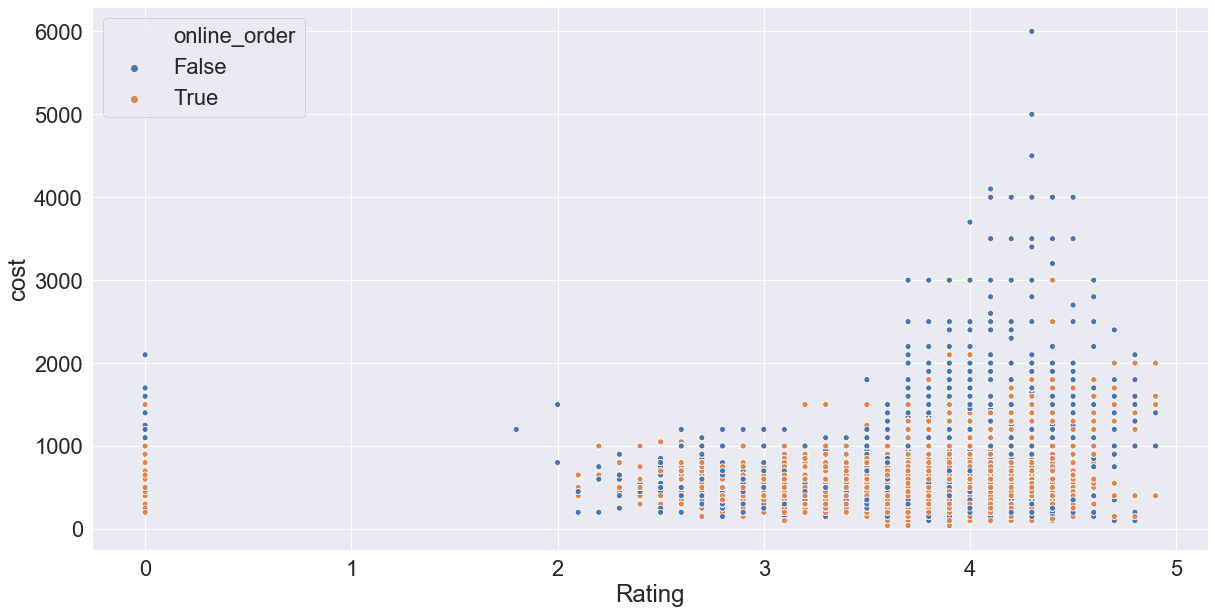

In [47]:
# Cost vs rating of restaurants
sns.scatterplot(data=zomato_df, x='Rating', y='cost', hue='online_order')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [48]:
# votes for restaurants accepting online orders
votes_yes = zomato_df[zomato_df['online_order']]['votes']
votes_no = zomato_df[zomato_df['online_order']==False]['votes']
trace0 = go.Box(y=votes_yes, name="accepts online order")
trace1 = go.Box(y=votes_no, name="does not accept online order")
layout = go.Layout(title="Box plot for votes for restaurants accepting online orders and not")
fig = go.Figure(data=[trace0, trace1], layout=layout)
iplot(fig)

In [49]:
# Best budget restaurants in a location of a certain type

# Lets first filter the columns we're going to work with.
# to reduce size of dataset and hence reduce complexity
loc_type_cost = zomato_df[['name','rest_type','location','Rating']]


def get_budget_rest_in_loc(loc, type):
    best_budget_rest = loc_type_cost[(loc_type_cost.location==loc) & (loc_type_cost.rest_type==type) & (loc_type_cost.Rating > 4.0)]
    # unique() needed b'coz same restaurant appears in two different list_city
    # (maybe b'coz it delivers food to customers from multiple areas even though 
    # it is physically not present in that locality)
    return best_budget_rest.name.unique() 


get_budget_rest_in_loc('Electronic City', 'Quick Bites')

array(['Popular Burger'], dtype=object)

In [50]:
zomato_df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

In [51]:
# What cuisines are popular(top 10) in which location?
rest_loc_cusine = zomato_df.groupby(['location','cuisines']).count().reset_index().sort_values(by='name', ascending=False).head(10)
rest_loc_cusine[['location','cuisines','name']].rename(columns={'name':'count'}).reset_index().drop('index', axis=1)

,location,cuisines,count
0,BTM,"North Indian, Chinese",86
1,BTM,North Indian,86
2,Koramangala 7th Block,North Indian,81
3,Whitefield,North Indian,74
4,JP Nagar,North Indian,68
5,HSR,North Indian,62
6,Bellandur,North Indian,61
7,Marathahalli,"North Indian, Chinese",60
8,Bannerghatta Road,"North Indian, Chinese",58
9,Indiranagar,North Indian,58


In [52]:
# How to plot data on map?

# Step 1: Lets first get the coordinates(lat,long) of the localities in Bangalore
location = pd.DataFrame({"Name": zomato_df['location'].unique()})
# Prepend each location with "Bangalore " so searching them on Nominatim is easier
location['Name'] = location['Name'].apply(lambda x: "Bangalore " + str(x))
lat_long = []
geolocator = Nominatim(user_agent="app")
for loc in location["Name"]:
    full_address = geolocator.geocode(loc) # this gives the entire address of that locality(including pincode etc)
    if full_address is None:
        lat_long.append(np.NaN)
    else:
        lat_long.append((full_address.latitude, full_address.longitude))

location['lat_long'] = lat_long
location

,Name,lat_long
0,Bangalore Banashankari,"(12.9152208, 77.573598)"
1,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Bangalore Jayanagar,"(12.9292731, 77.5824229)"
3,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"
4,Bangalore Rajarajeshwari Nagar,"(12.9274413, 77.5155224)"
...,...,...
83,Bangalore Sahakara Nagar,"(13.0621474, 77.58006135480495)"
84,Bangalore Jalahalli,"(13.0464531, 77.5483803)"
85,Bangalore Yelahanka,"(13.1006982, 77.5963454)"
86,Bangalore Magadi Road,"(12.9890242, 77.4718714)"


In [53]:
# Step 2: Expand (lat,long) tuple to separate columns
location.dropna(inplace=True)
lat,long = zip(*np.array(location['lat_long']))
location['lat'] = lat
location['long'] = long
location.drop('lat_long', inplace=True, axis=1)
location

,Name,lat,long
0,Bangalore Banashankari,12.915221,77.573598
1,Bangalore Basavanagudi,12.941726,77.575502
2,Bangalore Jayanagar,12.929273,77.582423
3,Bangalore Kumaraswamy Layout,12.908149,77.555318
4,Bangalore Rajarajeshwari Nagar,12.927441,77.515522
...,...,...,...
83,Bangalore Sahakara Nagar,13.062147,77.580061
84,Bangalore Jalahalli,13.046453,77.548380
85,Bangalore Yelahanka,13.100698,77.596345
86,Bangalore Magadi Road,12.989024,77.471871


In [54]:
# Step 3: Reset the names of location to remove "Bangalore "
location['Name'] = location['Name'].apply(lambda x: x.replace("Bangalore ", ""))

In [55]:
location

,Name,lat,long
0,Banashankari,12.915221,77.573598
1,Basavanagudi,12.941726,77.575502
2,Jayanagar,12.929273,77.582423
3,Kumaraswamy Layout,12.908149,77.555318
4,Rajarajeshwari Nagar,12.927441,77.515522
...,...,...,...
83,Sahakara Nagar,13.062147,77.580061
84,Jalahalli,13.046453,77.548380
85,Yelahanka,13.100698,77.596345
86,Magadi Road,12.989024,77.471871


In [56]:
# Step 4: Save the locations to a file so we don't have to find their lat,long every 
# time(its' time and network intensive process)
location.to_csv("bangalore_locations_lat_long.csv")
#location = pd.read_csv("bangalore_locations_lat_long.csv")

In [57]:
# Step 5: Get count of data that we need to plot(here it's the no. of restaurants per location)
location_count = zomato_df['location'].value_counts().reset_index().rename(columns={'index':'Name', 'location':'count'})
location_count

,Name,count
0,Koramangala 5th Block,1799
1,BTM,1482
2,Indiranagar,1371
3,HSR,1177
4,Jayanagar,1067
...,...,...
83,Magadi Road,2
84,Rajarajeshwari Nagar,2
85,West Bangalore,2
86,Yelahanka,2


In [58]:
# Step 6: Merge two df's to get (lat,lomg,count) in one DF for map plot
location = location.merge(location_count, on='Name').dropna() # 5 rows in lat_long is null(so drop those rows)
location

,Name,lat,long,count
0,Banashankari,12.915221,77.573598,387
1,Basavanagudi,12.941726,77.575502,286
2,Jayanagar,12.929273,77.582423,1067
3,Kumaraswamy Layout,12.908149,77.555318,56
4,Rajarajeshwari Nagar,12.927441,77.515522,2
...,...,...,...,...
78,Sahakara Nagar,13.062147,77.580061,20
79,Jalahalli,13.046453,77.548380,3
80,Yelahanka,13.100698,77.596345,2
81,Magadi Road,12.989024,77.471871,2


In [59]:
location

,Name,lat,long,count
0,Banashankari,12.915221,77.573598,387
1,Basavanagudi,12.941726,77.575502,286
2,Jayanagar,12.929273,77.582423,1067
3,Kumaraswamy Layout,12.908149,77.555318,56
4,Rajarajeshwari Nagar,12.927441,77.515522,2
...,...,...,...,...
78,Sahakara Nagar,13.062147,77.580061,20
79,Jalahalli,13.046453,77.548380,3
80,Yelahanka,13.100698,77.596345,2
81,Magadi Road,12.989024,77.471871,2


In [60]:
location[location['Name']=='Electronic City']

,Name,lat,long,count
57,Electronic City,12.97912,77.5913,326


In [61]:
# STep 7: Plot (lat,long,count) on map
from folium.plugins import HeatMap

def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(zoom_start=default_zoom_start, location=default_location)
    return base_map
# Generates basemap of Bangalore
basemap = generateBaseMap()
# Adds a layer of heatmap on top of basemap
HeatMap(location[['lat','long','count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

In [62]:
zomato_df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,list_city,Rating
0,Jalsa,True,True,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,Spice Elephant,True,False,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,San Churro Cafe,True,False,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,False,False,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,Grand Village,False,False,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [63]:
# Heatmap of restaurants serving only north indian food(on geo map)
location1 = pd.DataFrame(zomato_df[zomato_df['cuisines'] == 'North Indian'].groupby('location').name.count().reset_index())
location1.rename({'name':'count', 'location':'name'}, axis=1, inplace=True)

In [64]:
location1.rename({'name':'Name'}, axis=1, inplace=True)
location1

,Name,count
0,BTM,86
1,Banashankari,10
2,Banaswadi,4
3,Bannerghatta Road,36
4,Basavanagudi,12
5,Basaveshwara Nagar,1
6,Bellandur,61
7,Brigade Road,12
8,Brookefield,23
9,CV Raman Nagar,3


In [65]:
lat_long_loc = pd.read_csv('bangalore_locations_lat_long.csv', index_col=False)
lat_long_loc.drop('Unnamed: 0', axis=1, inplace=True)

In [66]:
lat_long_loc.dropna(inplace=True)

In [67]:
lat_long_loc

,Name,lat,long
0,Banashankari,12.915221,77.573598
1,Basavanagudi,12.941726,77.575502
2,Jayanagar,12.929273,77.582423
3,Kumaraswamy Layout,12.908149,77.555318
4,Rajarajeshwari Nagar,12.927441,77.515522
...,...,...,...
78,Sahakara Nagar,13.062147,77.580061
79,Jalahalli,13.046453,77.548380
80,Yelahanka,13.100698,77.596345
81,Magadi Road,12.989024,77.471871


In [68]:
location1 = location1.merge(lat_long_loc, on='Name').dropna()

In [69]:
location1

,Name,count,lat,long
0,BTM,86,12.911276,77.604565
1,Banashankari,10,12.915221,77.573598
2,Banaswadi,4,13.014162,77.651854
3,Bannerghatta Road,36,12.826493,77.586473
4,Basavanagudi,12,12.941726,77.575502
5,Basaveshwara Nagar,1,12.993224,77.539158
6,Bellandur,61,12.979120,77.591300
7,Brigade Road,12,12.973613,77.607472
8,Brookefield,23,12.966821,77.716889
9,Church Street,29,12.974294,77.652519


In [70]:
# Generates basemap of Bangalore
basemap = generateBaseMap()
# Adds a layer of heatmap on top of basemap
HeatMap(location1[['lat','long','count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

# Conclusion: SOouth Bangalore mostly has more North Indian restaurants.

In [71]:
# Heatmap of restaurants serving only South indian food(on geo map)
south_indian_rest = pd.DataFrame(zomato_df[zomato_df['cuisines'] == 'South Indian'].groupby('location').name.count().reset_index())
south_indian_rest.rename({'name':'count', 'location':'Name'}, axis=1, inplace=True)

In [72]:
south_indian_rest = south_indian_rest.merge(lat_long_loc, on='Name').dropna()
south_indian_rest

,Name,count,lat,long
0,BTM,6,12.911276,77.604565
1,Banashankari,25,12.915221,77.573598
2,Banaswadi,9,13.014162,77.651854
3,Bannerghatta Road,3,12.826493,77.586473
4,Basavanagudi,44,12.941726,77.575502
5,Brigade Road,12,12.973613,77.607472
6,Brookefield,3,12.966821,77.716889
7,Church Street,5,12.974294,77.652519
8,City Market,4,12.965718,77.576271
9,Commercial Street,6,12.982193,77.608313


In [73]:
basemap = generateBaseMap()
# Adds a layer of heatmap on top of basemap
HeatMap(south_indian_rest[['lat','long','count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

In [74]:
# Which are most popular casual dining restaurant chains and where are they located?
popular_chain_rest = zomato_df[zomato_df['rest_type']=='Casual Dining'].groupby('name').online_order.count().sort_values(ascending=False).reset_index().head(3)
popular_chain_rest.rename({'online_order':'count'}, axis=1, inplace=True)
popular_chain_rest

,name,count
0,Empire Restaurant,58
1,Mani's Dum Biryani,47
2,Chung Wah,45


In [75]:
def produce_chains(rest_name):
    chain_rest_loc = pd.DataFrame(zomato_df[zomato_df['name'] == rest_name].groupby('location').name.count().reset_index())
    chain_rest_loc.rename({'name':'count', 'location':'Name'}, axis=1, inplace=True)
    chain_rest_loc = chain_rest_loc.merge(lat_long_loc, on='Name').dropna()
    return chain_rest_loc # Returns columns ['Name', 'count', 'lat', 'long']

In [76]:
def produce_trace(chain_data, name):
    chain_data['text'] = chain_data['Name'] + ":" + chain_data['count'].astype(str)
    return go.Scattermapbox(lat=chain_data['lat'], lon=chain_data['long'], mode='markers', 
                     marker=go.scattermapbox.Marker(size=chain_data['count'] * 3),
                     text = chain_data['text'],
                     name = name)

In [77]:
data = []
# Without access token map will not be visible in the plot
mapbox_access_token = "pk.eyJ1Ijoic2hhaHVsZXMiLCJhIjoiY2p4ZTE5NGloMDc2YjNyczBhcDBnZnA5aCJ9.psBECQ2nub0o25PgHcU88w"
for rest_name in popular_chain_rest['name']:
    chain_data = produce_chains(rest_name)
    trace_chain = produce_trace(chain_data, rest_name)
    data.append(trace_chain)

layout = go.Layout(autosize=True, title="Casual Dining Restaurant chains locations around Banglore",
                   mapbox=dict(accesstoken=mapbox_access_token, center=dict(lat=12.96, lon=77.57), style='streets', bearing=0, zoom=10, pitch=0))

py.offline.iplot(dict(data=data, layout=layout), filename='Montreal Mapbox')

In [78]:
zomato_df['dish_liked'] = zomato_df['dish_liked'].apply(lambda x: x.split(',') if type(x)==str else [''])
zomato_df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,list_city,Rating
0,Jalsa,True,True,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer ...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,Spice Elephant,True,False,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Th...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,San Churro Cafe,True,False,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot ...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,False,False,88,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,Grand Village,False,False,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [79]:
top_9_rest_types = zomato_df['rest_type'].value_counts()[:9].index
top_9_rest_types

Index(['Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor',
       'Casual Dining, Bar', 'Delivery', 'Bar', 'Bar, Casual Dining',
       'Takeaway, Delivery'],
      dtype='object')

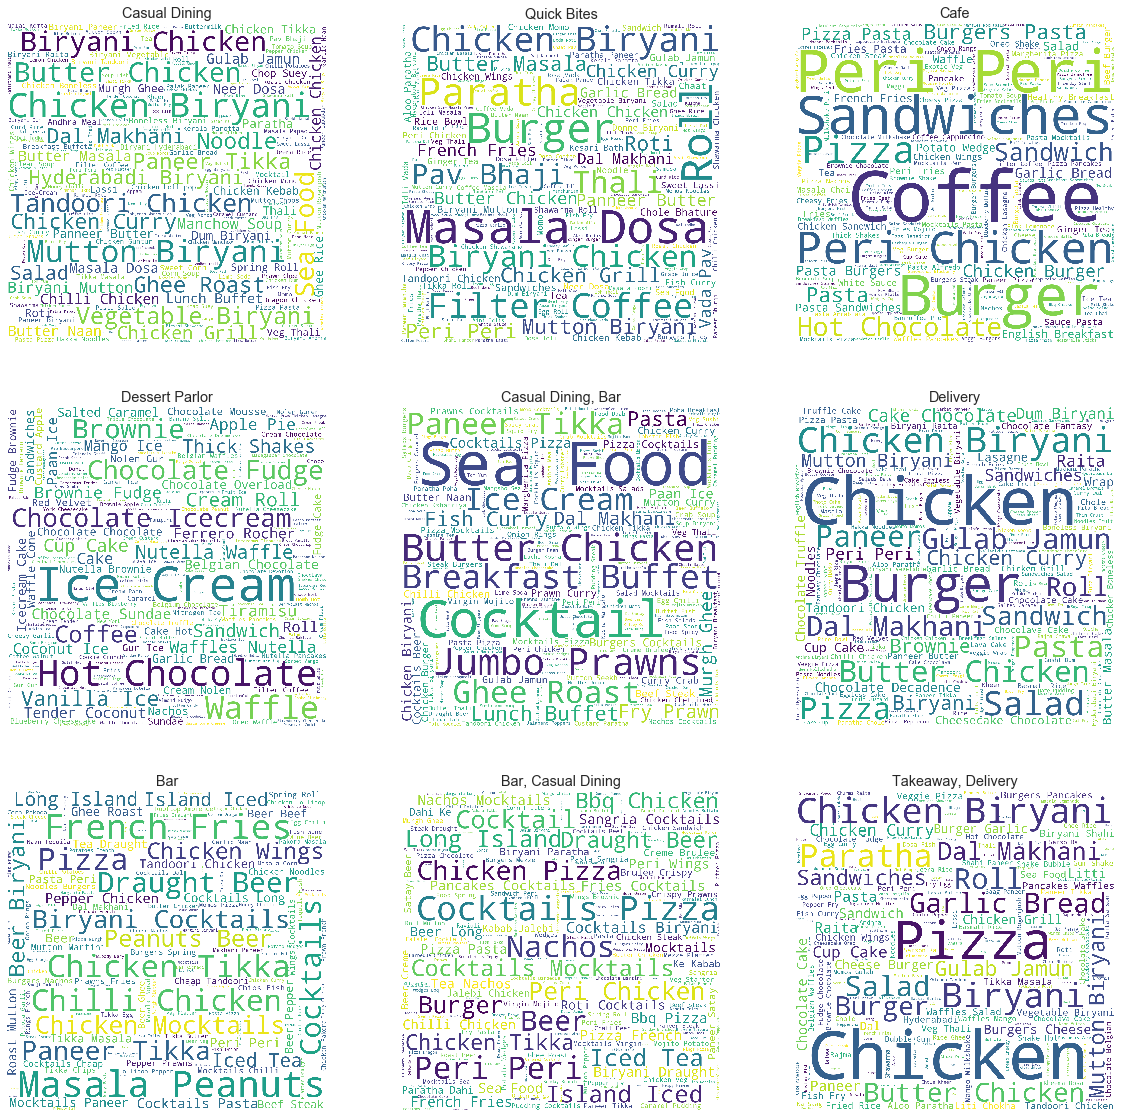

In [88]:
def produce_wordcloud(restaurant):
    plt.figure(figsize=(20,20))
    for index,rest_type in enumerate(restaurant):
        plt.subplot(3,3,index+1) # (3,3,1) .... (3,3,9)
        list_dish_list = zomato_df.loc[zomato_df['rest_type'] == rest_type, 'dish_liked'].tolist()
        corpus = ",".join(dish for dishes in list_dish_list for dish in dishes) # much faster than sth like "corpus = corpus.join(dish)"
        wc = WordCloud(max_font_size=None, background_color='white', width=1500, height=1500).generate(corpus)
        plt.imshow(wc)
        plt.title(rest_type)
        plt.axis('off')
        
produce_wordcloud(top_9_rest_types)

In [107]:
# Lets analyze some reviews now
all_reviews = []
for name, rate_reviews in tqdm(zip(zomato_df['name'], zomato_df['reviews_list'])):
    for rate, review in eval(rate_reviews):
        if rate:
            rate = float(rate.lstrip("Rated "))
            review = review.lstrip("RATED").strip()
            all_reviews.append([name, rate, review])

rating_df = pd.DataFrame(all_reviews, columns=['name','rating','review'])

23395it [00:11, 2085.10it/s]


In [110]:
# Remove all unwanted characters(except alphabets, digits and spaces) in review text
rating_df['review'] = rating_df['review'].apply(lambda x: re.sub("[^a-zA-Z0-9\s]", "", x))

In [112]:
rating_df

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...
...,...,...,...
1080184,Chime - Sheraton Grand Bengaluru Whitefield Ho...,1.0,The service is bad We ordered 4 Stella Artois ...
1080185,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,Nice bar inside Sheraton The hosts are friendl...
1080186,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,My review based on food drink service\n\nFood ...
1080187,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,I visited chime bar at Sheraton hotel it was n...


In [120]:
# Top 9 most reviewed restaurants
top_9_most_reviewed = rating_df['name'].value_counts()[:9]
top_9_most_reviewed = top_9_most_reviewed.index
top_9_most_reviewed

Index(['Hammered', 'Mast Kalandar', 'Truffles', 'Onesta', 'Crawl Street',
       'Brooks and Bonds Brewery', 'Stoner', 'Cafe Azzure', 'Cafe @ Elanza'],
      dtype='object')

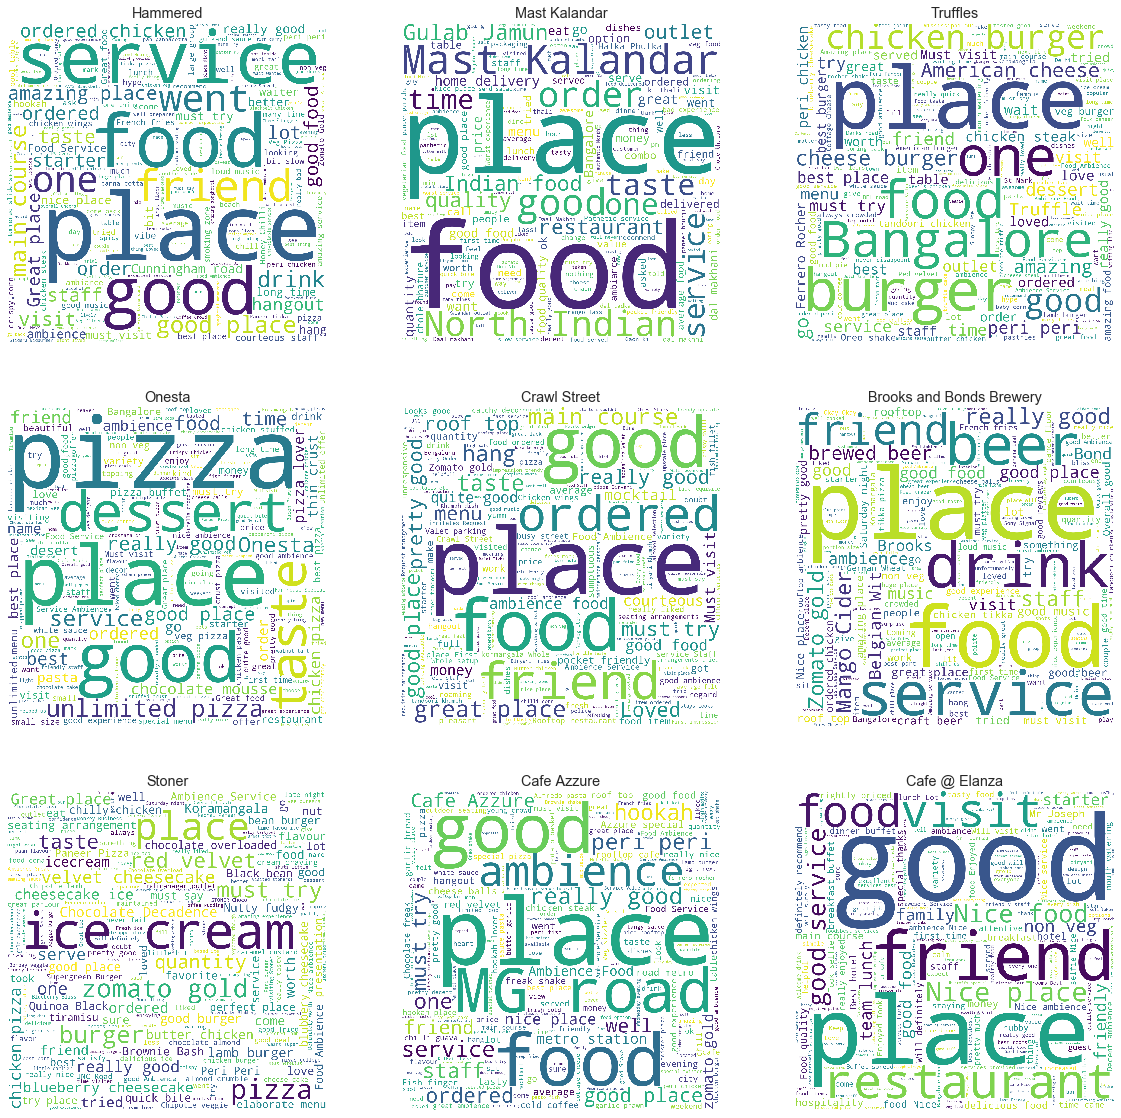

In [125]:
# Lets create wordcloud of these top 9 most reviewed restaurants
def produce_wordcloud(restaurant):
    plt.figure(figsize=(20,20))
    for index,rest_name in enumerate(restaurant):
        plt.subplot(3,3,index+1) # (3,3,1) .... (3,3,9)
        reviews_list = rating_df.loc[rating_df['name'] == rest_name, 'review'].tolist()
        corpus = ",".join(word  for review in reviews_list for word in review.split(" "))
        wc = WordCloud(max_font_size=None, background_color='white', width=1500, height=1500).generate(corpus)
        plt.imshow(wc)
        plt.title(rest_name)
        plt.axis('off')
        
produce_wordcloud(top_9_most_reviewed)